In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [11]:
# loading the csv data to a Pandas DataFrame
silver_data = pd.read_csv('new_data.csv')

In [12]:
# print first 5 rows in the dataframe
silver_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
# print last 5 rows of the dataframe
silver_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
4225,25-09-2023,1841.285580,129.706183,71.249520,13.198525,1.233159
4226,26-09-2023,2797.329168,126.729140,46.448135,24.758896,1.075114
4227,27-09-2023,1691.418297,83.450957,53.909334,44.625172,1.483336
4228,28-09-2023,2327.914202,126.688778,30.521861,21.799082,1.311898
4229,29-09-2023,1468.219123,81.586744,77.870222,16.725314,1.332160


In [14]:
# number of rows and columns
silver_data.shape

(4230, 6)

In [15]:
# getting some basic informations about the data
silver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4230 entries, 0 to 4229
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4230 non-null   object 
 1   SPX      4230 non-null   float64
 2   GLD      4230 non-null   float64
 3   USO      4230 non-null   float64
 4   SLV      4230 non-null   float64
 5   EUR/USD  4230 non-null   float64
dtypes: float64(5), object(1)
memory usage: 198.4+ KB


In [16]:
# checking the number of missing values
silver_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
# getting the statistical measures of the data
silver_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,4230.000000,4230.000000,4230.000000,4230.000000,4230.000000
mean,1700.837508,114.738583,37.725698,23.408102,1.269414
std,563.266296,21.506670,20.714108,9.324848,0.139102
min,676.530029,70.000000,7.960000,8.850000,1.000043
25%,1238.170437,98.322317,20.782631,15.910000,1.138823
50%,1669.848745,114.870436,35.590680,19.930009,1.288874
75%,2121.804447,124.967500,47.840329,30.776877,1.372360
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [18]:
correlation = silver_data.corr()

C:\Users\91892\AppData\Local\Temp\ipykernel_10968\660943657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = silver_data.corr()


<AxesSubplot:>

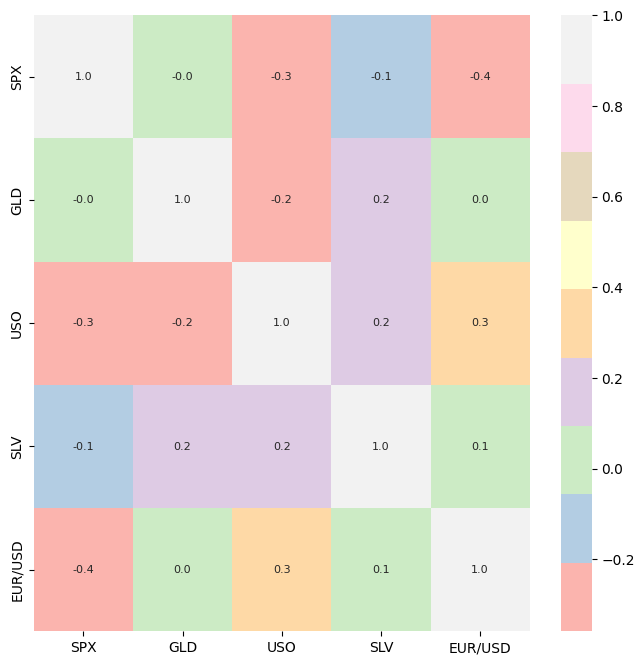

In [19]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=False, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Pastel1')

In [20]:
# correlation values of SLV
print(correlation['SLV'])

SPX       -0.089362
GLD        0.230473
USO        0.189571
SLV        1.000000
EUR/USD    0.089860
Name: SLV, dtype: float64


C:\Users\91892\AppData\Local\Temp\ipykernel_10968\4177042700.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(silver_data['SLV'],color='blue')


<AxesSubplot:xlabel='SLV', ylabel='Density'>

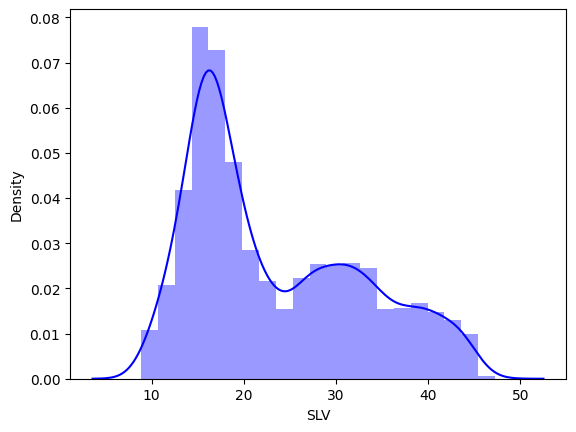

In [21]:
# checking the distribution of the SLV Price
sns.distplot(silver_data['SLV'],color='blue')

Splitting the Features and Target

In [22]:
X = silver_data.drop(['Date','SLV'],axis=1)
Y = silver_data['SLV']

In [23]:
print(X)

              SPX         GLD        USO   EUR/USD
0     1447.160034   84.860001  78.470001  1.471692
1     1447.160034   85.570000  78.370003  1.474491
2     1411.630005   85.129997  77.309998  1.475492
3     1416.180054   84.769997  75.500000  1.468299
4     1390.189941   86.779999  76.059998  1.557099
...           ...         ...        ...       ...
4225  1841.285580  129.706183  71.249520  1.233159
4226  2797.329168  126.729140  46.448135  1.075114
4227  1691.418297   83.450957  53.909334  1.483336
4228  2327.914202  126.688778  30.521861  1.311898
4229  1468.219123   81.586744  77.870222  1.332160

[4230 rows x 4 columns]


In [24]:
print(Y)

0       15.180000
1       15.285000
2       15.167000
3       15.053000
4       15.590000
          ...    
4225    13.198525
4226    24.758896
4227    44.625172
4228    21.799082
4229    16.725314
Name: SLV, Length: 4230, dtype: float64


Splitting into Training data and Test Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [28]:
#Checking Accuracy
regressor.score(X_train,Y_train)

0.9158587857181835

Model Evaluation

In [29]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[33.82269924 31.2752002  36.8925997  27.2681529  13.56284    14.69491738
 20.48768234 31.21630039 23.31877694 16.23561298 27.89830689 15.2248
 26.36649276 22.02450007 19.65518016 24.35095588 11.05708756 33.59330085
 25.78524571 16.33801134 25.26138587 28.40775484 29.24725888 19.60093829
 17.90900088 18.92619995 31.67439964 15.5404     28.73014956 21.30334172
 18.92139999 31.2690002  31.87759997 30.36120037 19.07610531 27.84032224
 25.33586053 28.41356605 22.07139835 16.97749996 16.62469963 13.3898
 26.50058466 22.21129228 30.18714376 15.41859586 28.67313069 17.18690009
 31.18025705 29.84089989 15.66125015 17.43340031 16.45622979 15.91290004
 16.27763703 27.62550012 23.42139669 17.09256896 28.68780385 32.61679667
 17.19459995 31.12963114 31.76474691 14.5957     29.37412668 16.08699992
 17.95598338 16.24933667 26.45263535 14.46561241 31.92409494 28.10737718
 17.75559067 16.67450019 28.81537489 23.24673999 28.27465435 17.08844432
 23.4374319  38.02020012 19.38063272 20.0074999  24.8950556

In [31]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.3955595922465148


Compare the Actual Values and Predicted Values in a Plot

In [32]:
Y_test = list(Y_test)

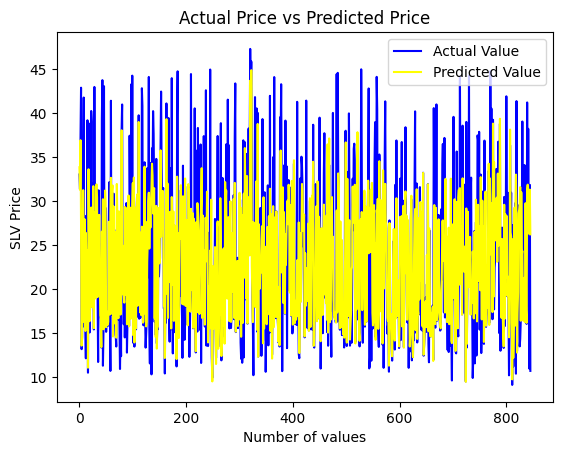

In [33]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('SLV Price')
plt.legend()
plt.show()

building a predictive system

In [34]:
input_data = (1416.25,89.54, 74.25, 1.4869)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[18.03293208]
The insurance cost is USD  18.032932077900014


c:\Users\91892\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [35]:
import pickle

In [36]:
pickle.dump(regressor,open("silver_predictor.pkl","wb"))

In [37]:
regressor = pickle.load(open('silver_predictor.pkl',"rb"))

In [38]:
predict = regressor.predict(input_data_reshaped)[0]

c:\Users\91892\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
predict

18.032932077900014